In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install ucimlrepo

  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)


In [9]:
from ucimlrepo import fetch_ucirepo

In [11]:
air_quality=fetch_ucirepo(id=360)

air_quality

In [15]:
#connvert to dataframe
data=air_quality.data.features
data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


#Data Preprocessing Steps

In [18]:
df=data[['CO(GT)', 'C6H6(GT)','NOx(GT)','NO2(GT)']]
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [20]:
df.isnull().sum()

CO(GT)      0
C6H6(GT)    0
NOx(GT)     0
NO2(GT)     0
dtype: int64

In [22]:
df.shape

(9357, 4)

In [24]:
#parameters for isolation forest
n_estimators=100 #number of trees in the forest
contamination=0.01
sample_size=256

In [28]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=n_estimators,
                      contamination=contamination,
                      max_samples=sample_size,
                      random_state=42)


In [34]:
model.fit(df)

IsolationForest(contamination=0.01, max_samples=256, random_state=42)

In [36]:
model.fit(df)
# Predict anomalies
anomaly_labels = model.predict(df)
# Add anomaly labels to the dataframe
df['anomaly' ] = anomaly_labels

C:\Users\vedap\AppData\Local\Temp\ipykernel_22580\3129404119.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anomaly' ] = anomaly_labels


In [38]:
# check the value counts of the anomaly labels
df['anomaly'].value_counts ()

anomaly
 1    9263
-1      94
Name: count, dtype: int64

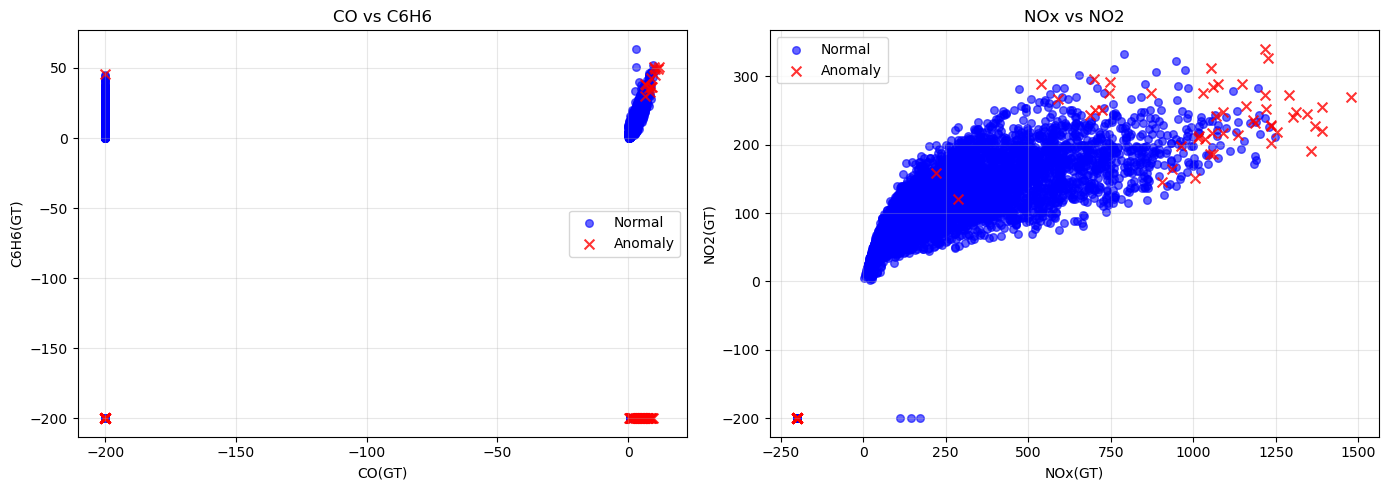

Normal data points: 9263
Anomalies detected: 94


In [44]:
fig,axes=plt.subplots(1, 2, figsize=(14,5))

normal = df[df['anomaly' ] == 1]
anomaly = df[df['anomaly' ] == -1]

# Plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend ()
axes[0].grid(True, alpha=0.3)

#Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")

In [ ]:
# saved model
import joblib
joblib.dump(model, 'isolation_forest_air_quality.pkl')